# Proyek Analisis Data: Bike Sharing
- Nama: Ayu Kirana Vijayanti Indarto
- Email: ayukiranav136@gmail.com
- Id Dicoding ayukv136

## Menentukan Pertanyaan Bisnis

- Apakah terdapat pengaruh musim terhadap jumlah penyewa sepeda baik Casual maupun Registered?
- Bagaimana variable temp mempengaruhi jumlah total penyewa sepeda?
- Bagaimana tren penggunaan sepeda pada tahun 2011 dan 2012, manakah yang lebih unggul?

## Menyiapkan semua library yang dibutuhkan

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Wrangling

### Gathering Data

Melakukan impor file **day.csv** dan **hour.csv** 

In [35]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [36]:
hr_df = pd.read_csv("data/hour.csv")
hr_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

### Menilai data day_df

#### 1. Cek tipe data day_df

In [37]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Jika dilihat pada data di atas, masih terdapat kesalahan tipe data pada dteday.

#### 2. Cek missing values day_df

In [38]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dapat dilihat dari data di atas, tidak terdapat nilai null atau missing values sehingga data aman.

#### 3. Cek duplikasi data day_df

In [39]:
print('Jumlah duplikasi data: ', day_df.duplicated().sum())

Jumlah duplikasi data:  0


Tidak terdapat duplikasi data atau data yang double artinya seluruh data bersifat unik.

#### 4. Cek nilai statistik day_df

In [40]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Jika dilihat pada tabel di atas, tidak terdapat keanehan statistik pada tabel day_df.

### Menilai data hr_df

#### 1. Cek tipe data hr_df

In [41]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Jika dilihat pada data di atas, masih terdapat kesalahan tipe data pada dteday.

#### 2. Cek missing values hr_df

In [42]:
hr_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dapat dilihat dari data di atas, tidak terdapat nilai null atau missing values sehingga data aman.

#### 3. Cek duplikasi data hr_df

In [43]:
print('Jumlah duplikasi data: ', hr_df.duplicated().sum())

Jumlah duplikasi data:  0


Tidak terdapat duplikasi data atau data yang double artinya seluruh data bersifat unik.

#### 4. Cek nilai statistik hr_df

In [44]:
hr_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Jika dilihat pada tabel di atas, tidak terdapat keanehan statistik pada tabel day_df.

### Cleaning Data

Pada tahap cleaning data akan dilakukan penghapusan data yang tidak diperlukan dalam menganalisis bisnis dan mengubah nama variable agar data dapat dipahami dengan baik oleh audiens.

#### 1. Menghapus tabel hr_df

Tabel **hr_df** dapat dihapus karena tidak terlalu berbeda jauh dengan tabel **day_df** hanya terdapat perbedaan pada kolom **hr** yang tidak terlalu berguna pada proses analisis ini.

In [45]:
del hr_df

#### 2. Menghapus kolom pada day_df

Menghapus beberapa kolom pada **day_df** yang tidak diperlukan pertanyaan bisnis seperti kolom instant, humidity, dan windspeed.

In [46]:
drop_col = ['instant', 'hum', 'windspeed']

for i in day_df.columns:
    if i in drop_col:
        day_df.drop(labels=i, axis=1, inplace=True)

day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,82,1518,1600


#### 3. Mengubah tipe data dan nama kolom

Berdasarkan proses pengecekan data pada tabel **day_csv** sebelumnya, terdapat 1 kolom yang tidak sesuai dengan tipe data seharusnya yaitu kolom **dteday** yang mana akan dirubah dari tipe data *object* menjadi *datetime*.
Selain itu, saya akan merubah nama dari beberapa kolom seperti
- dteday -> dateday
- year -> year
- mnth -> month
- weathersit -> weather
- cnt -> count

In [47]:
# Mengubah nama kolom
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,82,1518,1600


In [48]:
# Mengubah angka menjadi keterangan
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

day_df['month']= day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
}) 

day_df['weather_cond'] = day_df['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [49]:
# Mengubah tipe data
day_df['dateday'] = pd.to_datetime(day_df.dateday)

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,casual,registered,count
0,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,331,654,985
1,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,131,670,801
2,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,120,1229,1349
3,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,108,1454,1562
4,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,82,1518,1600


## Exploratory Data Analysis (EDA)

### Eksplorasi data day_df

Jumlah penyewa sepeda, Casual dan Registered, akan dikelompokkan berdasarkan musim, hari, cuaca, dan bulan. 

#### Mengelompokkan penyewa sepeda berdasarkan musim (season)

In [50]:
day_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['min','max', 'sum', 'mean'],
})

casual   registered count                            
               mean         mean   min   max      sum         mean
season                                                            
Fall    1202.611702  4441.691489  1115  8714  1061129  5644.303191
Spring   334.928177  2269.204420   431  7836   471348  2604.132597
Summer  1106.097826  3886.233696   795  8362   918589  4992.331522
Winter   729.112360  3999.050562    22  8555   841613  4728.162921

Berdasarkan tabel di atas, musim dengan penyewa, baik Casual maupun Registered, paling banyak adalah musim gugur (Fall), sedangkan musim dengan penyewa paling sedikit adalah musim semi (Spring).

#### Mengelompokkan penyewa sepeda berdasarkan hari (weekday)

In [51]:
day_df.groupby(by='weekday').agg({
    'count': ['min','max', 'sum', 'mean'],
})

count                           
          min   max     sum         mean
weekday                                 
Fri      1167  8362  487790  4690.288462
Mon        22  7525  455503  4338.123810
Sat       627  8714  477807  4550.542857
Sun       605  8227  444027  4228.828571
Thu       431  7804  485395  4667.259615
Tue       683  7767  469109  4510.663462
Wed       441  8173  473048  4548.538462

Berdasarkan tabel di atas, hari dengan penyewa sepeda paling banyak adalah hari Jumat (Fri), sedangkan hari dengan penyewa paling sedikit adalah hari Minggu (Sun). Urutan dari terbanyak adalah Jumat (Fri), Kamis (Thu), Sabtu (Sat), Rabu (Wed), Selasa (Tue), Senin (Mon), dan Minggu (Sun).

#### Mengelompokkan penyewa berdasarkan cuaca (weather_cond)

In [52]:
day_df.groupby(by='weather_cond').agg({
    'count': ['min','max', 'sum', 'mean'],
})

count                            
                      min   max      sum         mean
weather_cond                                         
Clear/Partly Cloudy   431  8714  2257952  4876.786177
Light Snow/Rain        22  4639    37869  1803.285714
Misty/Cloudy          605  8362   996858  4035.862348

Berdasarkan tabel di atas, penyewa cenderung suka untuk menyewa sepeda saat cuaca cerah atau mendung, sedangkan saat cuaca salju atau hujan tidak banyak penyewa.

#### Mengelompokkan penyewa berdasarkan bulan (month)

In [53]:
day_df.groupby(by='month').agg({
    'count': ['min','max', 'sum', 'mean'],
})

count                           
        min   max     sum         mean
month                                 
Apr     795  7460  269094  4484.900000
Aug    1115  7865  351194  5664.419355
Dec     441  6606  211036  3403.806452
Feb    1005  5062  151352  2655.298246
Jan     431  4521  134933  2176.338710
Jul    3285  8173  344948  5563.677419
Jun    3767  8120  346342  5772.366667
Mar     605  8362  228920  3692.258065
May    2633  8294  331686  5349.774194
Nov    1495  6852  254831  4247.183333
Oct      22  8156  322352  5199.225806
Sep    1842  8714  345991  5766.516667

Berdasarkan tabel di atas, bulan dengan rata-rata paling besar adalah bulan Agustus dan bulan dengan rata-rata paling kecil adalah bulan Januari.

#### Mengelompokkan penyewa berdasarkan hari libur (holiday)

In [54]:
day_df.groupby(by='holiday').agg({
    'count': ['min','max', 'sum', 'mean'],
})

count                            
          min   max      sum         mean
holiday                                  
0          22  8714  3214244  4527.104225
1        1000  7403    78435  3735.000000

Berdasarkan tabel di atas, penyewa sepeda cenderung suka menyewa sepeda saat hari biasa atau non-holiday dibandingkan ketika hari libur atau holiday.

#### Membandingkan jumlah penyewa pada workingday

In [55]:
day_df.groupby(by='workingday').agg({
    'count': ['min','max', 'sum', 'mean'],
})

count                            
             min   max      sum         mean
workingday                                  
0            605  8714  1000269  4330.168831
1             22  8362  2292410  4584.820000

Berdasarkan tabel di atas, penyewa sepeda cenderung suka menyewa sepeda pada saat hari kerja (working day) dibandingkan hari libur.

#### Hubungan antara penyewa (Casual, Registered, dan Count), temp, dan atemp

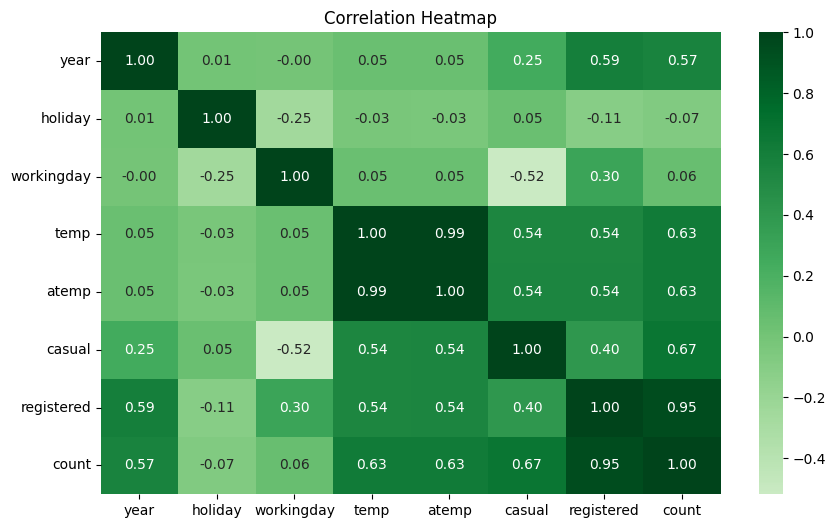

In [56]:
fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = day_df.corr(numeric_only=True)

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="Greens",
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Berdasarkan hasil analisis di atas, diperoleh pernyataan berikut ini
- Antara temp dan atemp memiliki korelasi yang kuat (0.99)
- casual dan registered berkorelasi cukup kuat dengan temp dan atemp (0.54)
- registered berkorelasi kuat dengan casual (0.40)
- count berkorelasi kuat dengan temp, atemp, casual, dan registered (0.63, 0.63, 0.67, dan 0.95)

## Visualization & Explanatory Analysis

### Pertanyaan 1: 

#### Apakah terdapat pengaruh musim terhadap jumlah penyewa sepeda baik Casual maupun Registered?

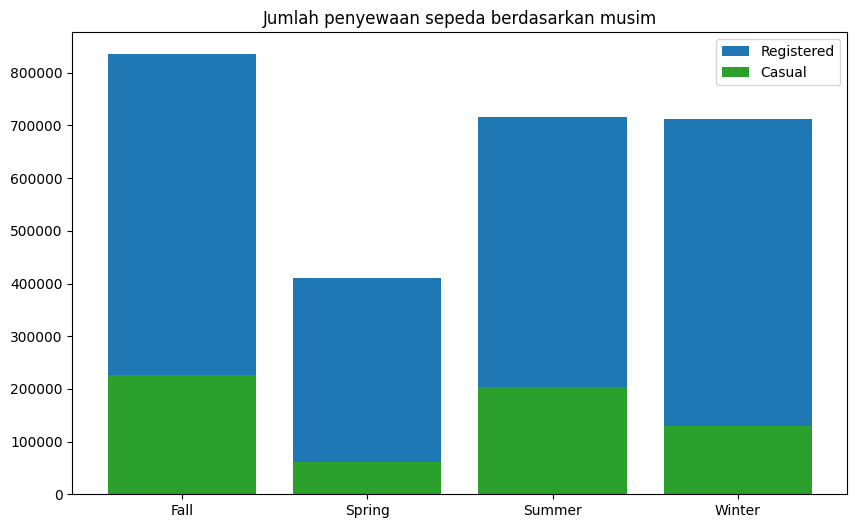

In [57]:
# Mengelompokkan data berdasarkan musim dan menghitung jumlah penyewa Casual maupun Registered
seasonal_usage = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))

plt.bar(
    seasonal_usage['season'],
    seasonal_usage['registered'],
    label='Registered',
    color='tab:blue'
)

plt.bar(
    seasonal_usage['season'],
    seasonal_usage['casual'],
    label='Casual',
    color='tab:green'
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Jumlah penyewaan sepeda berdasarkan musim')
plt.legend()
plt.show()

Berdasarkan gambar di atas, terdapat pengaruh variabel season terhadap jumlah penyewa sepeda. Para penyewa baik Casual maupun Registered paling suka untuk menyewa sepeda saat musim gugur (Fall). Kemudian diikuti oleh musim panas (Summer), musim salju (Winter), dan musim semi (Spring).

### Pertanyaan 2: 

#### Bagaimana variable temp mempengaruhi jumlah total penyewa sepeda?

Text(0.5, 1.0, 'Temperature vs Count')

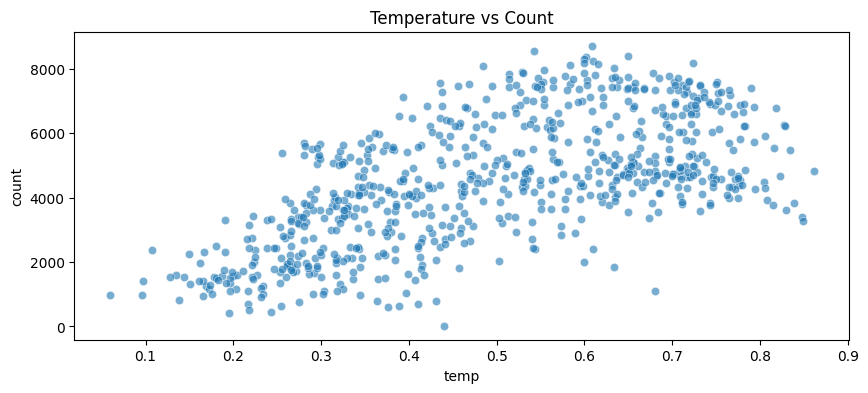

In [58]:
plt.figure(figsize=(10, 4))

sns.scatterplot(
    x='temp',
    y='count',
    data=day_df,
    alpha=0.6
)
plt.title('Temperature vs Count')

Hubungan antara variabel temp dan count memiliki korelasi yang positif antara dua variabel tersebut. Dengan demikian, apabila temperatur meningkat, jumlah total penyewa sepeda akan cenderung meningkat pula. 

### Pertanyaan 3:

#### Bagaimana tren penggunaan sepeda pada tahun 2011 dan 2012, manakah yang lebih unggul?

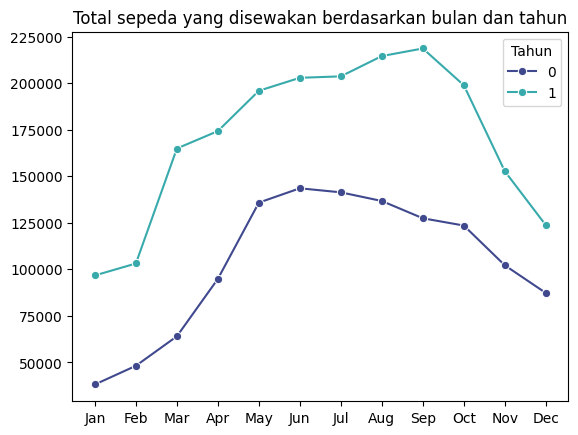

In [59]:
day_df['month'] = pd.Categorical(day_df['month'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], ordered=True)

monthly_counts = day_df.groupby(by=['month','year']).agg({ 
    'count': 'sum'
}).reset_index()

sns.lineplot(
    x="month", y="count", hue="year", data=monthly_counts, palette="mako", marker="o")

plt.title("Total sepeda yang disewakan berdasarkan bulan dan tahun")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper right")
plt.show()

Berdasarkan gambar visualisasi di atas menggunakan line plot, jumlah total sepeda yang disewakan pada tahun 2012 (diwakili nomor 1) jelas lebih unggul dibandingkan pada tahun 2011 (diwakili nomor 0). Jumlah penyewaan sepeda terbanyak pada tahun 2012 adalah pada bulan September dan paling sedikit adalah Januari. Sedangkan pada tahun 2011, jumlah penyewaan sepeda terbanyak adalah pada bulan Juni dan paling sedikit adalah bulan Januari.

## Conclusion

- Conclution pertanyaan 1

Pada visualisasi yang ditampilkan, musim Fall menjadi musim yang banyak digemari pengguna untuk bersepeda baik Casual maupun Registered. Musim Spring menjadi musim yang paling kurang diminati pengguna untuk bersepeda karena terdapat beberapa faktor seperti adanya hari libur, kerja, dan pengaruh cuaca. 

- Conclution pertanyaan 2

Berdasarkan visualisasi yang ditampilkan, terdapat korelasi positif antara variabel temperatur dan count sehingga apabila temperatur meningkat, jumlah total penyewa sepeda akan meningkat

- Conclution pertanyaan 3

Berdasarkan visualisasi yang ditampilkan, jumlah total sepeda yang disewakan pada tahun 2012 seluruhnya lebih tinggi dibandingkan dengan tahun 2011. Dari kedua tahun tersebut, juga memiliki dasar dan puncak bulan yang berbeda. Tahun 2012 didasari oleh bulan Januari dan puncaknya pada bulan September. Sedangkan tahun 2011 didasari oleh bulan Januari dan puncaknya pada bulan Juni.